In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm

In [3]:
uploaded = files.upload()

Saving dataset_Facebook - dataset_Facebook.csv.csv to dataset_Facebook - dataset_Facebook.csv.csv


In [5]:
data_original = pd.read_csv(io.BytesIO(uploaded['dataset_Facebook - dataset_Facebook.csv.csv']))
data_original.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumption,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
#Extract Data
selected_columns = ['Post Hour', 'Lifetime Post Total Reach']
data = data_original[selected_columns]
df = pd.DataFrame(data)
df


,Post Hour,Lifetime Post Total Reach
0,3,2752
1,10,10460
2,3,2413
3,10,50128
4,3,7244
...,...,...
495,2,4684
496,8,3480
497,2,3778
498,11,4156


In [7]:
#Run Regression
X = sm.add_constant(df['Post Hour'])
model = sm.OLS(df['Lifetime Post Total Reach'], X).fit()
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Lifetime Post Total Reach   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.002
Method:                        Least Squares   F-statistic:                  0.005548
Date:                       Mon, 13 Nov 2023   Prob (F-statistic):              0.941
Time:                               23:07:55   Log-Likelihood:                -5724.9
No. Observations:                        500   AIC:                         1.145e+04
Df Residuals:                            498   BIC:                         1.146e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

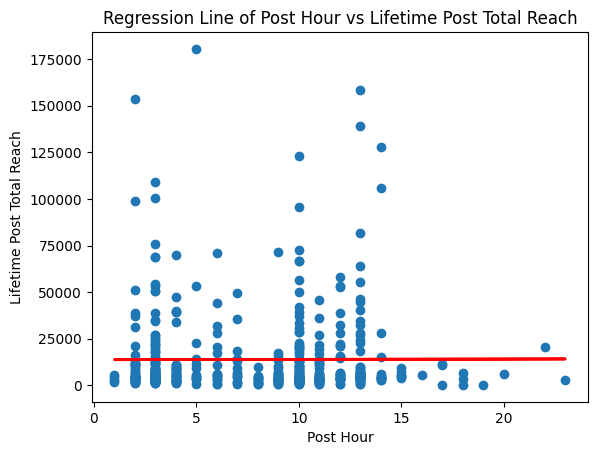

In [8]:
plt.scatter(df['Post Hour'], df['Lifetime Post Total Reach'])
plt.plot(df['Post Hour'], model.predict(X), color='red', linewidth=2)  # Plot regression line
plt.xlabel('Post Hour')
plt.ylabel('Lifetime Post Total Reach')
plt.title('Regression Line of Post Hour vs Lifetime Post Total Reach')
plt.show()

In [9]:
#Extract the Data for ANOVA

one_Am = df[df['Post Hour'] == 1]['Lifetime Post Total Reach']
two_Am = df[df['Post Hour'] == 2]['Lifetime Post Total Reach']
three_Am = df[df['Post Hour'] == 3]['Lifetime Post Total Reach']
four_Am = df[df['Post Hour'] == 4]['Lifetime Post Total Reach']
five_Am = df[df['Post Hour'] == 5]['Lifetime Post Total Reach']
six_Am = df[df['Post Hour'] == 6]['Lifetime Post Total Reach']
seven_Am = df[df['Post Hour'] == 7]['Lifetime Post Total Reach']
eight_Am = df[df['Post Hour'] == 8]['Lifetime Post Total Reach']
nine_Am = df[df['Post Hour'] == 9]['Lifetime Post Total Reach']
ten_Am = df[df['Post Hour'] == 10]['Lifetime Post Total Reach']
eleven_Am = df[df['Post Hour'] == 11]['Lifetime Post Total Reach']
twelve_Pm = df[df['Post Hour'] == 12]['Lifetime Post Total Reach']

one_Pm = df[df['Post Hour'] == 13]['Lifetime Post Total Reach']
two_Pm = df[df['Post Hour'] == 14]['Lifetime Post Total Reach']
three_Pm = df[df['Post Hour'] == 15]['Lifetime Post Total Reach']
four_Pm = df[df['Post Hour'] == 16]['Lifetime Post Total Reach']
five_Pm = df[df['Post Hour'] == 17]['Lifetime Post Total Reach']
six_Pm = df[df['Post Hour'] == 18]['Lifetime Post Total Reach']
seven_Pm = df[df['Post Hour'] == 19]['Lifetime Post Total Reach']
eight_Pm = df[df['Post Hour'] == 20]['Lifetime Post Total Reach']
ten_Pm = df[df['Post Hour'] == 22]['Lifetime Post Total Reach']
eleven_Pm = df[df['Post Hour'] == 23]['Lifetime Post Total Reach']

In [10]:
# Perform ANOVA
f_stat, p_value_anova = f_oneway(one_Am, two_Am, three_Am, four_Am, five_Am, six_Am, seven_Am, eight_Am, nine_Am, ten_Am, eleven_Am, twelve_Pm, one_Pm, two_Pm,three_Pm, four_Pm, five_Pm, six_Pm, seven_Pm, eight_Pm, ten_Pm, eleven_Pm)
f_stat, p_value_anova
print(f"ANOVA: f_stat={f_stat:.2f}, p_value={p_value_anova:.2f}")


ANOVA: f_stat=1.00, p_value=0.47


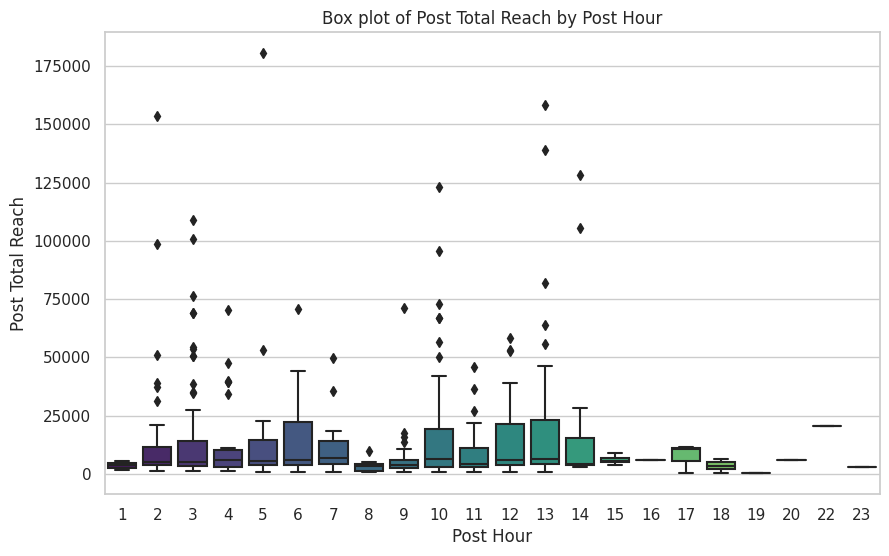

In [11]:
# Set style
sns.set(style="whitegrid")

# Create box plots
plt.figure(figsize=(10,6))
sns.boxplot(x='Post Hour', y='Lifetime Post Total Reach', data=data, palette='viridis')
plt.title('Box plot of Post Total Reach by Post Hour')
plt.xlabel('Post Hour')
plt.ylabel('Post Total Reach')
plt.show()

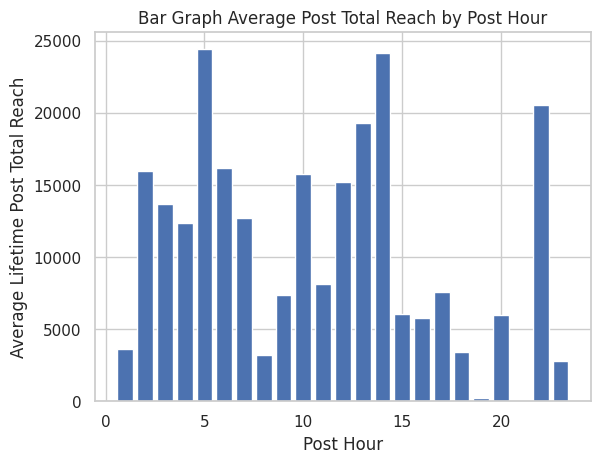

In [15]:
#Bar Graph
grouped_df = df.groupby('Post Hour')['Lifetime Post Total Reach'].mean().reset_index()

plt.bar(grouped_df['Post Hour'], grouped_df['Lifetime Post Total Reach'])

plt.xlabel('Post Hour')
plt.ylabel('Average Lifetime Post Total Reach')
plt.title('Bar Graph Average Post Total Reach by Post Hour')

plt.show()